In [1]:
import pandas as pd

import sklearn as sc 



In [2]:
df = pd.read_csv('depression_input.csv')

In [3]:
df

,id,Gender,Age,Sleep Duration,Dietary Habits,Have you ever had suicidal thoughts ?,Work/Study Hours,Family History of Mental Illness,Depression
0,2,False,33.0,5-6 hours,Healthy,Yes,3.0,No,1
1,8,True,24.0,5-6 hours,Moderate,No,3.0,Yes,0
2,26,False,31.0,Less than 5 hours,Healthy,No,9.0,Yes,0
3,30,True,28.0,7-8 hours,Moderate,Yes,4.0,Yes,1
4,32,True,25.0,5-6 hours,Moderate,Yes,1.0,No,0
...,...,...,...,...,...,...,...,...,...
27896,140685,True,27.0,5-6 hours,Unhealthy,Yes,7.0,Yes,0
27897,140686,False,27.0,Less than 5 hours,Healthy,No,0.0,Yes,0
27898,140689,False,31.0,5-6 hours,Unhealthy,No,12.0,No,0
27899,140690,True,18.0,Less than 5 hours,Healthy,Yes,10.0,No,1


In [4]:
df.set_index('id', inplace = True)



In [5]:
df

,Gender,Age,Sleep Duration,Dietary Habits,Have you ever had suicidal thoughts ?,Work/Study Hours,Family History of Mental Illness,Depression
id,,,,,,,,
2,False,33.0,5-6 hours,Healthy,Yes,3.0,No,1
8,True,24.0,5-6 hours,Moderate,No,3.0,Yes,0
26,False,31.0,Less than 5 hours,Healthy,No,9.0,Yes,0
30,True,28.0,7-8 hours,Moderate,Yes,4.0,Yes,1
32,True,25.0,5-6 hours,Moderate,Yes,1.0,No,0
...,...,...,...,...,...,...,...,...
140685,True,27.0,5-6 hours,Unhealthy,Yes,7.0,Yes,0
140686,False,27.0,Less than 5 hours,Healthy,No,0.0,Yes,0
140689,False,31.0,5-6 hours,Unhealthy,No,12.0,No,0


In [6]:
from sklearn.preprocessing import OneHotEncoder


encoder = OneHotEncoder(sparse_output=False)  # Set sparse_output=False for a dense array
encoded_features = encoder.fit_transform(df[['Sleep Duration']])


encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(['Sleep Duration']))
df_final = pd.concat([df, encoded_df], axis=1)

print(df_final)


       Gender   Age     Sleep Duration Dietary Habits  \
0         NaN   NaN                NaN            NaN   
1         NaN   NaN                NaN            NaN   
2       False  33.0          5-6 hours        Healthy   
3         NaN   NaN                NaN            NaN   
4         NaN   NaN                NaN            NaN   
...       ...   ...                ...            ...   
140685   True  27.0          5-6 hours      Unhealthy   
140686  False  27.0  Less than 5 hours        Healthy   
140689  False  31.0          5-6 hours      Unhealthy   
140690   True  18.0  Less than 5 hours        Healthy   
140699  False  27.0  Less than 5 hours        Healthy   

       Have you ever had suicidal thoughts ?  Work/Study Hours  \
0                                        NaN               NaN   
1                                        NaN               NaN   
2                                        Yes               3.0   
3                                        NaN       

In [7]:
df_encoded = pd.get_dummies(df, columns=['Sleep Duration', 'Dietary Habits','Work/Study Hours'])

In [8]:
df_encoded

,Gender,Age,Have you ever had suicidal thoughts ?,Family History of Mental Illness,Depression,Sleep Duration_5-6 hours,Sleep Duration_7-8 hours,Sleep Duration_Less than 5 hours,Sleep Duration_More than 8 hours,Sleep Duration_Others,...,Work/Study Hours_3.0,Work/Study Hours_4.0,Work/Study Hours_5.0,Work/Study Hours_6.0,Work/Study Hours_7.0,Work/Study Hours_8.0,Work/Study Hours_9.0,Work/Study Hours_10.0,Work/Study Hours_11.0,Work/Study Hours_12.0
id,,,,,,,,,,,,,,,,,,,,,
2,False,33.0,Yes,No,1,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
8,True,24.0,No,Yes,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
26,False,31.0,No,Yes,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
30,True,28.0,Yes,Yes,1,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
32,True,25.0,Yes,No,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140685,True,27.0,Yes,Yes,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
140686,False,27.0,No,Yes,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
140689,False,31.0,No,No,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [9]:
df_encoded['Have you ever had suicidal thoughts ?'] = df_encoded['Have you ever had suicidal thoughts ?'].replace({'Yes': True, 'No': False})
df_encoded['Family History of Mental Illness'] = df_encoded['Family History of Mental Illness'].replace({'Yes': True, 'No': False})



In [10]:
df_encoded

,Gender,Age,Have you ever had suicidal thoughts ?,Family History of Mental Illness,Depression,Sleep Duration_5-6 hours,Sleep Duration_7-8 hours,Sleep Duration_Less than 5 hours,Sleep Duration_More than 8 hours,Sleep Duration_Others,...,Work/Study Hours_3.0,Work/Study Hours_4.0,Work/Study Hours_5.0,Work/Study Hours_6.0,Work/Study Hours_7.0,Work/Study Hours_8.0,Work/Study Hours_9.0,Work/Study Hours_10.0,Work/Study Hours_11.0,Work/Study Hours_12.0
id,,,,,,,,,,,,,,,,,,,,,
2,False,33.0,True,False,1,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
8,True,24.0,False,True,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
26,False,31.0,False,True,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
30,True,28.0,True,True,1,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
32,True,25.0,True,False,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140685,True,27.0,True,True,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
140686,False,27.0,False,True,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
140689,False,31.0,False,False,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [11]:
df_encoded = df_encoded.drop(columns = ['Age'])

df_encoded

,Gender,Have you ever had suicidal thoughts ?,Family History of Mental Illness,Depression,Sleep Duration_5-6 hours,Sleep Duration_7-8 hours,Sleep Duration_Less than 5 hours,Sleep Duration_More than 8 hours,Sleep Duration_Others,Dietary Habits_Healthy,...,Work/Study Hours_3.0,Work/Study Hours_4.0,Work/Study Hours_5.0,Work/Study Hours_6.0,Work/Study Hours_7.0,Work/Study Hours_8.0,Work/Study Hours_9.0,Work/Study Hours_10.0,Work/Study Hours_11.0,Work/Study Hours_12.0
id,,,,,,,,,,,,,,,,,,,,,
2,False,True,False,1,1,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
8,True,False,True,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
26,False,False,True,0,0,0,1,0,0,1,...,0,0,0,0,0,0,1,0,0,0
30,True,True,True,1,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
32,True,True,False,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140685,True,True,True,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
140686,False,False,True,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
140689,False,False,False,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [12]:
x = df_encoded.drop(columns = 'Depression')
y = df_encoded['Depression']



In [13]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Assume df is already created and X, Y are defined as before
# Splitting into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# Standardizing the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Fit on training data, transform training data
X_test_scaled = scaler.transform(X_test)       # Use the same scaler to transform test data



In [14]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

# Initialize the SVM classifier
svm_model = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)

# Fit the model
svm_model.fit(X_train_scaled, Y_train)

# Make predictions
Y_pred = svm_model.predict(X_test_scaled)

# Evaluate the model
print("\nClassification Report:")
print(classification_report(Y_test, Y_pred))

print("\nAccuracy Score:")
print(accuracy_score(Y_test, Y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.68      0.72      3505
           1       0.79      0.85      0.82      4866

    accuracy                           0.78      8371
   macro avg       0.77      0.76      0.77      8371
weighted avg       0.78      0.78      0.78      8371


Accuracy Score:
0.7778043244534704


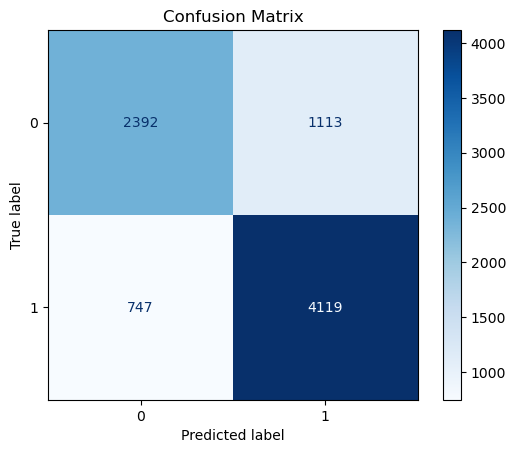

In [15]:
# Visualizing a confusion matrix is an essential step in evaluating a classifier's performance. Here's how you can do it in Python using matplotlib and scikit-learn:
# Example: Visualizing a Confusion Matrix

import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


# Generate confusion matrix
cm = confusion_matrix(Y_test, Y_pred)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()